## A.I. Assignment 5

## Learning Goals

By the end of this lab, you should be able to:
* Get more familiar with tensors in pytorch 
* Create a simple multilayer perceptron model with pytorch
* Visualise the parameters


### Task

Build a fully connected feed forward network that adds two bits. Determine the a propper achitecture for this network (what database you use for this problem? how many layers? how many neurons on each layer? what is the activation function? what is the loss function? etc)

Create at least 3 such networks and compare their performance (how accurate they are?, how farst they are trained to get at 1 accuracy?)

Display for the best one the weights for each layer.


In [58]:
import torch
import torch.nn as nn
from collections import OrderedDict


In [138]:
# your code here

model1 = nn.Sequential(OrderedDict([
    ('hidden', nn.Linear(2, 2)),
    ('output', nn.Linear(2, 1))
]))

In [139]:
print(model1)

Sequential(
  (hidden): Linear(in_features=2, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=1, bias=True)
)


In [140]:
# your code here
X_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
print(X_train)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [141]:
# your code here
y_train = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)
print(y_train)

tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [142]:
# your code here
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

In [143]:
# your code here
# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs1 = model1(X_train)
    loss = criterion(outputs1, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print progress
    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [100/1000], Loss: 0.2848
Epoch [200/1000], Loss: 0.2528
Epoch [300/1000], Loss: 0.2500
Epoch [400/1000], Loss: 0.2500
Epoch [500/1000], Loss: 0.2500
Epoch [600/1000], Loss: 0.2500
Epoch [700/1000], Loss: 0.2500
Epoch [800/1000], Loss: 0.2500
Epoch [900/1000], Loss: 0.2500
Epoch [1000/1000], Loss: 0.2500


In [155]:
# your code her

In [148]:
# your code here
# print model wights
for name, param in model1.named_parameters():
    if param.requires_grad:
        print(name, param.data)

hidden.weight tensor([[0.8894, 0.4917],
        [0.0462, 0.0255]])
hidden.bias tensor([0.2192, 0.5827])
output.weight tensor([[-0.0335,  0.6446]])
output.bias tensor([0.1317])


Epoch [1000/5000], Loss: 0.6931
Epoch [2000/5000], Loss: 0.6931
Epoch [3000/5000], Loss: 0.6931
Epoch [4000/5000], Loss: 0.6931
Epoch [5000/5000], Loss: 0.6931
Test Accuracy: 50.00%


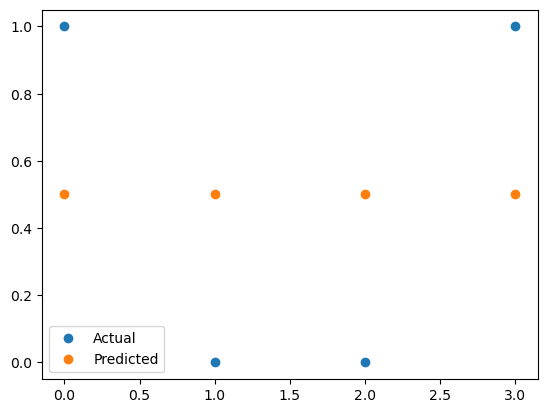

In [151]:
import torch
import torch.nn as nn

model2 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 1)),
    ('Relu1', nn.ReLU()),
    ('fc2', nn.Linear(1, 1)),
    ('Relu2', nn.ReLU())
]))
# Define the input size, output size, and hidden size

# Define the layers of the network using nn.Sequential and OrderedDict

# Define the loss function and optimizer
criterion2 = nn.BCELoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

# Train the network
X_train2 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train2 = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model2(X_train2)
    loss = criterion2(outputs, y_train2)
    
    # Backward and optimize
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    # Print the loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the network on the test set
X_test2 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_test2 = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

with torch.no_grad():
    outputs = model2(X_test2)
    predicted = (outputs >= 0.5).int()
    accuracy = (predicted == y_test).sum().item() / predicted.shape[0]
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

outputs2 = model1(X_train).detach().numpy()

# Plot the predicted outputs against the actual outputs
plt.plot(y_test.numpy(), 'o', label='Actual')
plt.plot(outputs2, 'o', label='Predicted')
plt.legend()
plt.show()

Epoch [1000/5000], Loss: 0.7046
Epoch [2000/5000], Loss: 0.7046
Epoch [3000/5000], Loss: 0.7046
Epoch [4000/5000], Loss: 0.7046
Epoch [5000/5000], Loss: 0.7046
Test Accuracy: 50.00%


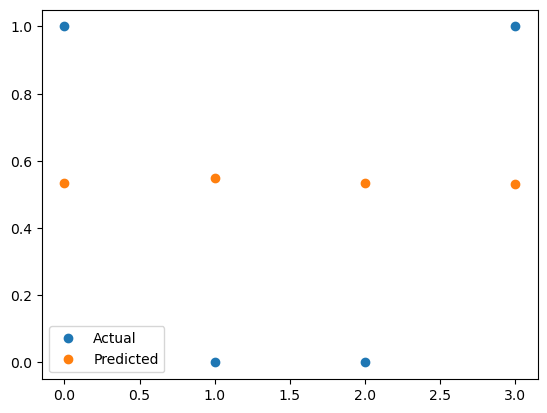

In [156]:
model3 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(2, 5)),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(5, 3)),
    ('relu2', nn.ReLU()),
    ('fc3', nn.Linear(3, 1)),
    ('sigmoid', nn.Sigmoid())
]))

# Define the loss function and optimizer
criterion3 = nn.BCELoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

# Train the network
X_train3 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_train3 = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model3(X_train3)
    loss = criterion2(outputs, y_train3)
    
    # Backward and optimize
    optimizer2.zero_grad()
    loss.backward()
    optimizer2.step()
    
    # Print the loss every 1000 epochs
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Evaluate the network on the test set
X_test2 = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_test2 = torch.tensor([[1], [0], [0], [1]], dtype=torch.float32)

with torch.no_grad():
    outputs = model2(X_test2)
    predicted = (outputs >= 0.5).int()
    accuracy = (predicted == y_test).sum().item() / predicted.shape[0]
    print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

outputs2 = model3(X_train).detach().numpy()

# Plot the predicted outputs against the actual outputs
plt.plot(y_test.numpy(), 'o', label='Actual')
plt.plot(outputs2, 'o', label='Predicted')
plt.legend()
plt.show()